In [20]:
%matplotlib inline

import codecs
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
g = nx.read_gexf("../datasets/influences.gexf")

In [4]:
in_degrees = g.in_degree()
out_degrees = g.out_degree()

print np.mean(in_degrees.values())
print np.mean(out_degrees.values())

1.99851101846
1.99851101846


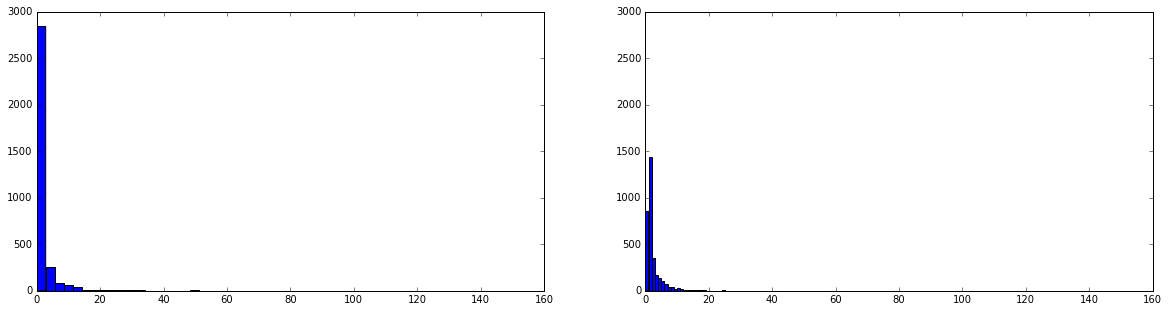

In [5]:
fig = plt.figure(figsize=(20,5))

ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1), sharex=ax1, sharey=ax1)

ax1.hist([ v for v in in_degrees.values() ], bins=50)
ax2.hist([ v for v in out_degrees.values() ], bins=50)


plt.show()

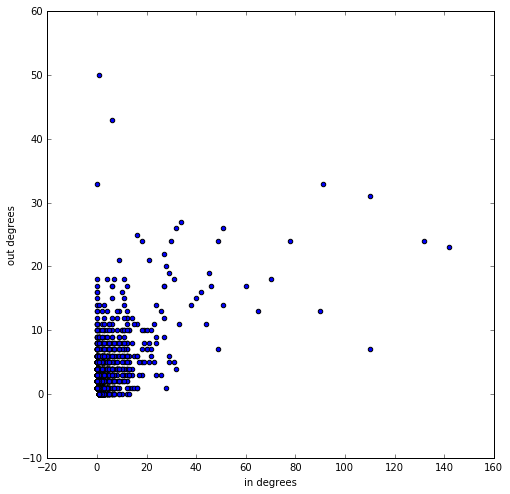

In [6]:
fig = plt.figure(figsize=(8,8))

x = [ v for v in in_degrees.values() ]
y = [ v for v in out_degrees.values() ]

plt.scatter(x, y)
plt.xlabel("in degrees")
plt.ylabel("out degrees")

# heatmap, xedges, yedges = np.histogram2d(x, y, bins=10)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# plt.clf()
# plt.imshow(heatmap, extent=extent)

plt.show()

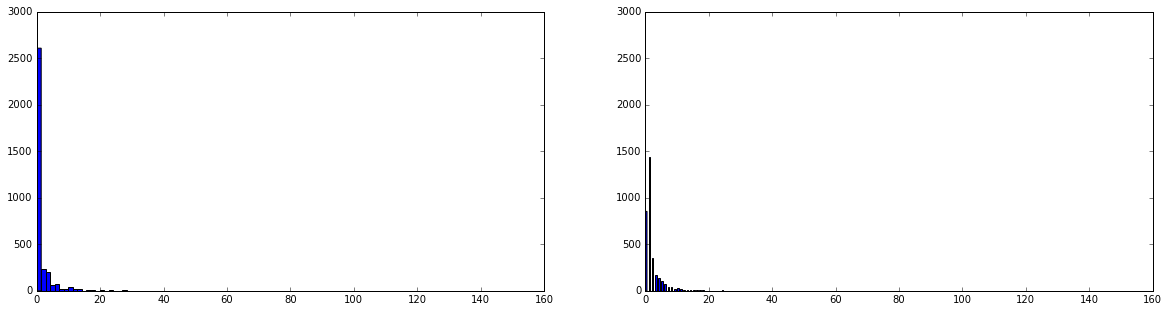

In [7]:
fig = plt.figure(figsize=(20,5))

ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1), sharex=ax1, sharey=ax1)

ax1.hist([ v for v in g.in_degree().values() ], bins=100)
ax2.hist([ v for v in g.out_degree().values() ], bins=100)


plt.show()

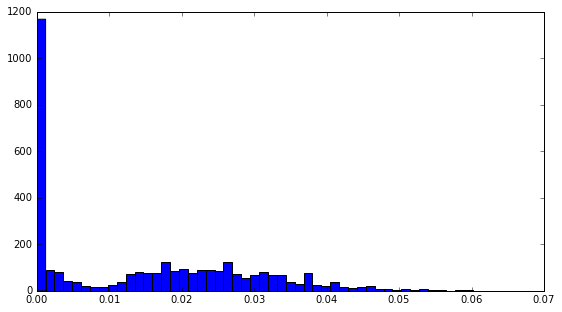

In [8]:
closeness_centrality = nx.closeness_centrality(g)

fig = plt.figure(figsize=(20,5))

ax1 = plt.subplot2grid((1,2), (0, 0))

ax1.hist([ v for v in closeness_centrality.values() ], bins=50)

plt.show()

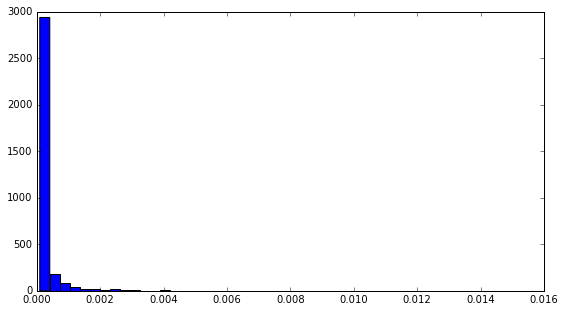

In [9]:
pageranks = nx.pagerank_numpy(g)

fig = plt.figure(figsize=(20,5))

ax1 = plt.subplot2grid((1,2), (0, 0))

ax1.hist([ v for v in pageranks.values() ], bins=50)
#ax2.hist([ v for v in nx.communicability_centrality(g.to_undirected()).values() ], bins=50)

plt.show()

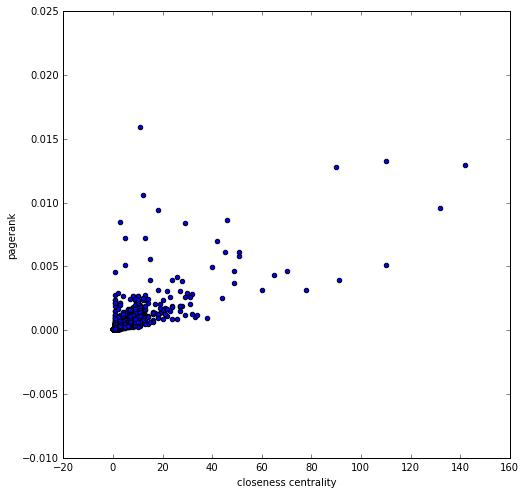

In [10]:
fig = plt.figure(figsize=(8,8))

plt.scatter([ v for v in in_degrees.values() ], [ v for v in pageranks.values() ])
plt.xlabel("closeness centrality")
plt.ylabel("pagerank")

plt.show()

In [11]:
dominating_set = nx.dominating_set(g)

print len(dominating_set)

2525


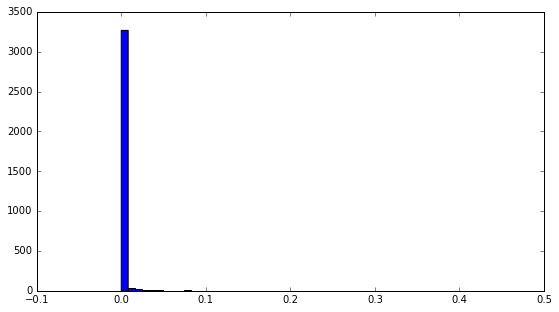

In [12]:
eigenvectors = nx.eigenvector_centrality_numpy(g)

fig = plt.figure(figsize=(20,5))

ax1 = plt.subplot2grid((1,2), (0, 0))

ax1.hist([ v for v in eigenvectors.values() ], bins=50)

plt.show()

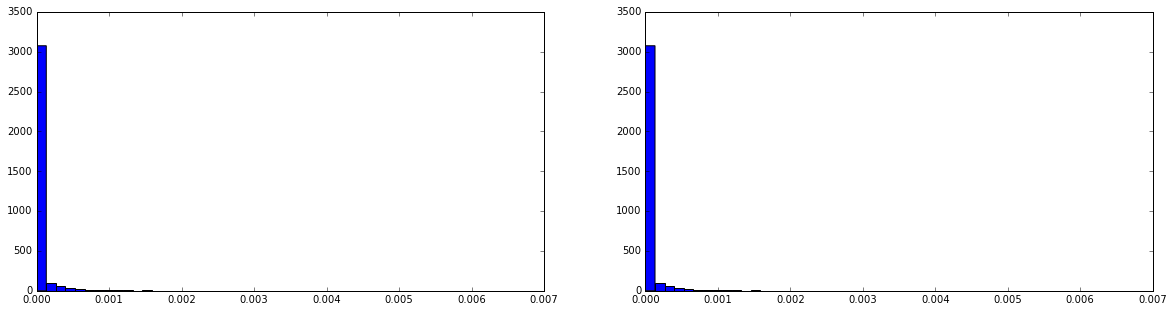

In [13]:
betweenness_centrality = nx.betweenness_centrality(g)
betweenness_centrality_norm = nx.betweenness_centrality(g, normalized=True)

fig = plt.figure(figsize=(20,5))

ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1), sharex=ax1, sharey=ax1)

ax1.hist([ v for v in betweenness_centrality.values() ], bins=50)
ax2.hist([ v for v in betweenness_centrality_norm.values() ], bins=50)


plt.show()

In [14]:
k_core = nx.k_core(g)

In [15]:
print k_core.nodes()

['Michael_Marder', 'Damaris_Cudworth_Masham', 'Henri_Bergson', u'S\xf8ren_Kierkegaard', 'Alain_Badiou', 'Johann_Wolfgang_von_Goethe', 'Emmanuel_Levinas', 'Richard_J._Bernstein', 'Edmund_Burke', 'John_Locke', u'Ren\xe9_Descartes', 'Hans-Georg_Gadamer', 'Plato', 'Karl_Popper', 'Jean-Jacques_Rousseau', 'Jacques_Lacan', 'Bertrand_Russell', 'Hannah_Arendt', u'Slavoj_\u017di\u017eek', 'Adam_Smith', 'Karl_Marx', 'Simon_Critchley', 'Gilles_Deleuze', 'Peter_Rollins', 'Cornelius_Castoriadis', 'Richard_Rorty', 'Montesquieu', 'Karl_Jaspers', 'Friedrich_Nietzsche', 'Boris_Groys', 'Augustine_of_Hippo', 'Sigmund_Freud', 'Friedrich_Heinrich_Jacobi', 'John_Stuart_Mill', 'Baruch_Spinoza', 'Edmund_Husserl', 'Carl_Schmitt', 'Ludwig_Wittgenstein', 'Mookie_Tenembaum', 'David_Hume', 'Theodor_W._Adorno', 'Simone_de_Beauvoir', 'Judith_Butler', 'William_James', 'Jacques_Derrida', 'Thomas_Hobbes', 'Georg_Wilhelm_Friedrich_Hegel', 'Gottfried_Wilhelm_Leibniz', 'Immanuel_Kant', 'Jean-Paul_Sartre', 'Johann_Gottlieb_

In [16]:
g_without_kcore = g.subgraph(list(set(g.nodes()) - set(k_core.nodes())))

In [17]:
nx.write_gexf(g_without_kcore, "../datasets/influences.nocore.gexf", encoding="utf-8")

In [22]:
def get_pagelength(name):
  return len(codecs.open("../datasets/pages/%s.html" % name.replace("/", "-") , "r", "utf-8").read())

## top 50

In [23]:
cols = pd.MultiIndex.from_product([["in degree", "out degree", "betweenness", "eigenvector", "page length"], ["value", "rank"]])

top100 = pd.DataFrame(index=g.nodes(), columns=cols)

pd.set_option('display.multi_sparse', True)

top100[("in degree", "value")] = [ in_degrees[k] for k in g.nodes() ]
top100[("out degree", "value")] = [ out_degrees[k] for k in g.nodes() ]
top100[("betweenness", "value")] = [ betweenness_centrality[k] for k in g.nodes() ]
top100[("eigenvector", "value")] = [ eigenvectors[k] for k in g.nodes() ]
top100[("page length", "value")] = [ get_pagelength(k) for k in g.nodes() ]

top100[("in degree", "rank")] = np.int64(list(top100[("in degree", "value")].rank(ascending=False)))
top100[("out degree", "rank")] = np.int64(list(top100[("out degree", "value")].rank(ascending=False)))
top100[("betweenness", "rank")] = np.int64(list(top100[("betweenness", "value")].rank(ascending=False)))
top100[("eigenvector", "rank")] = np.int64(list(top100[("eigenvector", "value")].rank(ascending=False)))
top100[("page length", "rank")] = np.int64(list(top100[("page length", "value")].rank(ascending=False)))

top100[("betweenness", "value")] = top100[("betweenness", "value")].round(4)
top100[("eigenvector", "value")] = top100[("eigenvector", "value")].round(4)

top100 = top100.sort_values(by=[("in degree", "value"), ("out degree", "value")], ascending=[0,0])

top100.head(50)

in degree      out degree        \
                                       value rank      value  rank   
Immanuel_Kant                            142    1         23    15   
Georg_Wilhelm_Friedrich_Hegel            132    2         24    12   
Karl_Marx                                110    3         31     5   
Aristotle                                110    3          7   192   
Martin_Heidegger                          91    5         33     3   
Plato                                     90    6         13    55   
Friedrich_Nietzsche                       78    7         24    12   
Ludwig_Wittgenstein                       70    8         18    24   
Alfred_North_Whitehead                    65    9         13    55   
Edmund_Husserl                            60   10         17    31   
Gottfried_Wilhelm_Leibniz                 51   11         26     7   
Baruch_Spinoza                            51   11         14    47   
Cornelius_Castoriadis                     49   13         24    12   
Thomas_Aquinas                            49   13          7   192   
René_Descartes                            46   15         17    31   
David_Hume                                45   16         19    20   
Søren_Kierkegaard                         44   17         11    77   
John_Locke                                42   18         16    37   
Jean-Jacques_Rousseau                     40   19         15    41   
Michel_Foucault                           38   20         14    47   
Gilles_Deleuze                            34   21         27     6   
Jacques_Derrida                           33   22         11    77   
John_Stuart_Mill                          32   23         26     7   
Sigmund_Freud                             32   23          4   465   
William_James                             31   25         18    24   
Max_Stirner                               31   25          5   344   
Damaris_Cudworth_Masham                   30   27         24    12   
Jean-Paul_Sartre                          29   29         19    20   
Charles_Sanders_Peirce                    29   29          6   254   
Plotinus                                  29   29          5   344   
Karl_Popper                               28   31         20    19   
Augustine_of_Hippo                        28   31          1  1783   
Noam_Chomsky                              27   35         22    16   
Stanley_Cavell                            27   35         17    31   
Bertrand_Russell                          27   35         17    31   
Friedrich_Wilhelm_Joseph_Schelling        27   35         12    65   
Henri_Bergson                             27   35          9   120   
Emmanuel_Levinas                          26   38         13    55   
Epicurus                                  26   38          3   623   
Jacques_Lacan                             24   41         14    47   
Arthur_Schopenhauer                       24   41          9   120   
Niccolò_Machiavelli                       24   41          8   150   
Abul_A'la_Maududi                         24   41          3   623   
Willard_Van_Orman_Quine                   23   44         11    77   
Thomas_Reid                               23   44          5   344   
Thomas_Hobbes                             22   47         10    97   
Oswald_Spengler                           22   47          7   192   
John_Dewey                                22   47          6   254   
Leo_Strauss                               21   50         21    17   
John_Rawls                                21   50          8   150   

                                   betweenness      eigenvector        \
                                         value rank       value  rank   
Immanuel_Kant                           0.0066    1      0.0011   181   
Georg_Wilhelm_Friedrich_Hegel           0.0055    2      0.0002   220   
Karl_Marx                               0.0041    6      0.0000   317   
Aristotle                    